# Part 1

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [41]:
df = pd.read_csv('Auto_Sales2022.csv',index_col = 0)

In [42]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,
2005,"1,052,224","1,244,753","1,564,938","1,493,837","1,488,171","1,671,401","1,795,944","1,474,130","1,321,156","1,139,217","1,160,447","1,475,649"
2006,"1,136,538","1,253,271","1,519,952","1,439,311","1,478,735","1,487,688","1,480,504","1,478,072","1,342,543","1,205,973","1,188,344","1,419,758"
2007,"1,079,891","1,244,375","1,528,582","1,326,837","1,550,609","1,433,282","1,302,661","1,467,601","1,305,275","1,221,485","1,170,035","1,377,542"
2008,"1,036,540","1,162,277","1,339,158","1,237,336","1,383,754","1,176,765","1,126,477","1,240,785","959,127","829,396","737,978","884,306"
2009,"650,608","681,676","847,002","822,746","919,295","850,654","991,950","1,254,982","740,394","832,953","741,826","1,013,629"
2010,"693,531","774,108","1,059,134","976,345","1,096,910","978,154","1,045,915","993,211","953,837","940,740","863,198","1,135,333"
2011,"815,408","987,265","1,238,252","1,149,240","1,052,417","1,044,037","1,055,231","1,067,895","1,048,158","1,015,016","986,664","1,236,129"
2012,"909,806","2,115,420","1,398,128","1,177,478","1,327,521","1,276,629","1,141,761","1,274,193","1,183,825","1,085,804","1,137,862","1,347,837"
2013,"1,037,967","1,185,746","1,444,773","1,276,318","1,434,096","1,396,038","1,306,885","1,494,273","1,128,124","1,198,989","1,236,413","1,350,623"


**Remove the comma, and divide the original data by ten thousands**

In [43]:
for i in range(len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',','').astype(float)
df = df.astype(float)/10000.0
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,
2005,105.2224,124.4753,156.4938,149.3837,148.8171,167.1401,179.5944,147.4130,132.1156,113.9217,116.0447,147.5649
2006,113.6538,125.3271,151.9952,143.9311,147.8735,148.7688,148.0504,147.8072,134.2543,120.5973,118.8344,141.9758
2007,107.9891,124.4375,152.8582,132.6837,155.0609,143.3282,130.2661,146.7601,130.5275,122.1485,117.0035,137.7542
2008,103.6540,116.2277,133.9158,123.7336,138.3754,117.6765,112.6477,124.0785,95.9127,82.9396,73.7978,88.4306
2009,65.0608,68.1676,84.7002,82.2746,91.9295,85.0654,99.1950,125.4982,74.0394,83.2953,74.1826,101.3629
2010,69.3531,77.4108,105.9134,97.6345,109.6910,97.8154,104.5915,99.3211,95.3837,94.0740,86.3198,113.5333
2011,81.5408,98.7265,123.8252,114.9240,105.2417,104.4037,105.5231,106.7895,104.8158,101.5016,98.6664,123.6129
2012,90.9806,211.5420,139.8128,117.7478,132.7521,127.6629,114.1761,127.4193,118.3825,108.5804,113.7862,134.7837
2013,103.7967,118.5746,144.4773,127.6318,143.4096,139.6038,130.6885,149.4273,112.8124,119.8989,123.6413,135.0623


In [44]:
df2 = df.stack().to_frame()

In [45]:
df2

0
Month              
2005  Jan  105.2224
      Feb  124.4753
      Mar  156.4938
      Apr  149.3837
      May  148.8171
...             ...
2022  Jul    0.0000
      Aug    0.0000
      Sep    0.0000
      Oct    0.0000
      Nov    0.0000

[215 rows x 1 columns]

In [46]:
df2.index.names = ['Year','Month']
df2=df2.reset_index().rename(columns= {0:'Sales'})  # change the column name "0" with "Sales"
df2

,Year,Month,Sales
0,2005,Jan,105.2224
1,2005,Feb,124.4753
2,2005,Mar,156.4938
3,2005,Apr,149.3837
4,2005,May,148.8171
...,...,...,...
210,2022,Jul,0.0000
211,2022,Aug,0.0000
212,2022,Sep,0.0000
213,2022,Oct,0.0000


In [47]:
df2.drop(df2[df2.Sales == 0.0].index, inplace=True)
df2.drop(df2[df2.Sales <44.0].index, inplace=True)

In [48]:
import datetime
df2.Year = df2.Year.astype(str)
df2['DateMonth'] = df2['Year']+'-'+df2['Month']
df2.DateMonth = df2.DateMonth.apply(lambda x: datetime.datetime.strptime(x,'%Y-%b'))
df2.DateMonth = pd.to_datetime(df2.DateMonth)
df2.set_index('DateMonth',inplace=True)
df2

,Year,Month,Sales
DateMonth,,,
2005-01-01,2005,Jan,105.2224
2005-02-01,2005,Feb,124.4753
2005-03-01,2005,Mar,156.4938
2005-04-01,2005,Apr,149.3837
2005-05-01,2005,May,148.8171
...,...,...,...
2021-10-01,2021,Oct,109.4817
2021-11-01,2021,Nov,104.0310
2021-12-01,2021,Dec,112.7850


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206 entries, 2005-01-01 to 2022-02-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    206 non-null    object 
 1   Month   206 non-null    object 
 2   Sales   206 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [50]:
df2.drop(['Year','Month'],axis=1, inplace=True)
df2

,Sales
DateMonth,
2005-01-01,105.2224
2005-02-01,124.4753
2005-03-01,156.4938
2005-04-01,149.3837
2005-05-01,148.8171
...,...
2021-10-01,109.4817
2021-11-01,104.0310
2021-12-01,112.7850


In [51]:
#aut2.to_csv('Auto_Sales2.csv', sep=",")

In [52]:
df2.describe()

,Sales
count,206.000000
mean,126.925116
std,25.426336
min,51.675700
25%,112.791850
50%,130.396800
75%,146.636675
max,211.542000


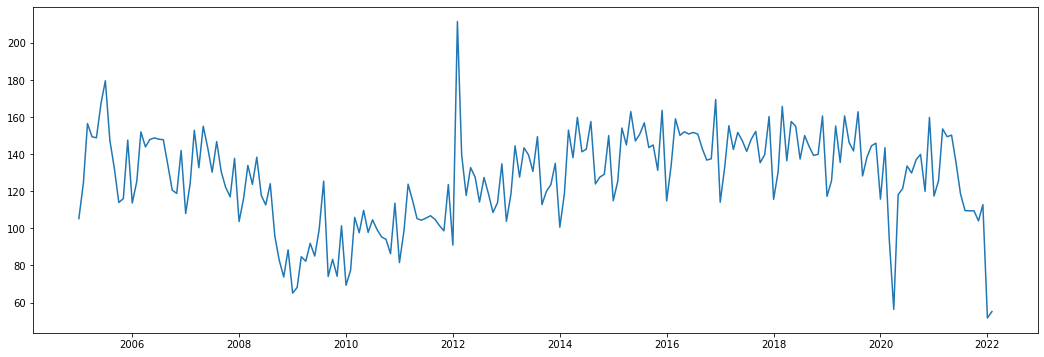

In [53]:
plt.figure(figsize =(18,6))
plt.plot(df2.Sales)

# Basic Exploratory Data Analysis

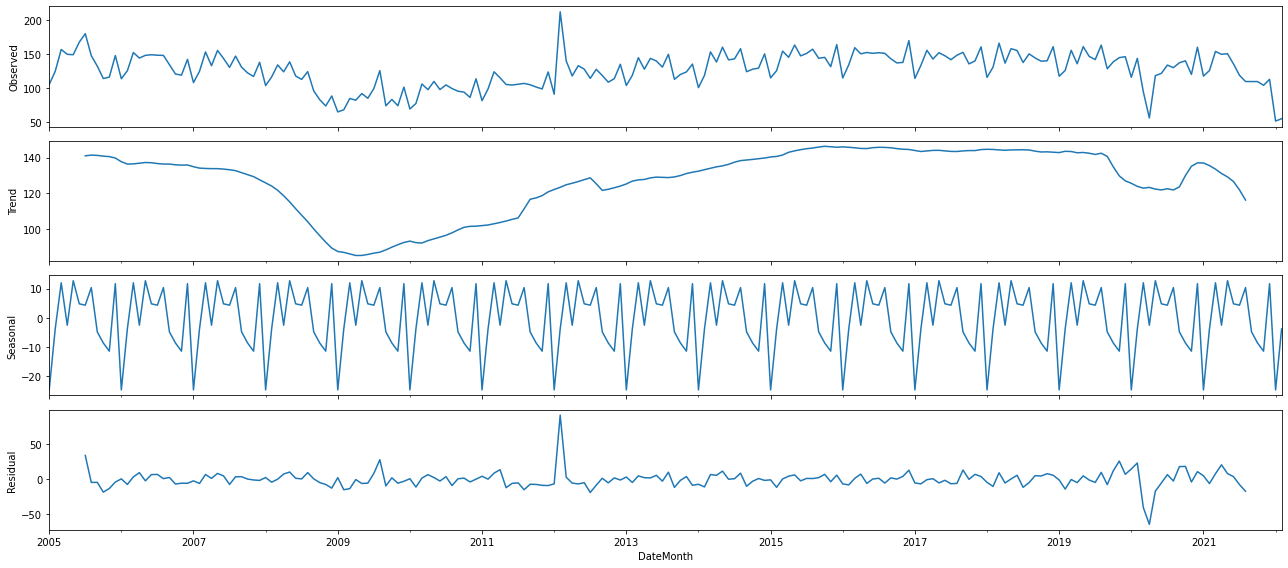

In [54]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize']= 18,8
decomposition = sm.tsa.seasonal_decompose(df2,model='additive')
fig = decomposition.plot()
plt.show()

# Part 2: Simple Moving Average

In [55]:
df2['SMA_3'] = df2.iloc[:,0].rolling(window=3).mean()
df2['SMA_4'] = df2.iloc[:,0].rolling(window=4).mean()

In [56]:
df2

,Sales,SMA_3,SMA_4
DateMonth,,,
2005-01-01,105.2224,NaN,NaN
2005-02-01,124.4753,NaN,NaN
2005-03-01,156.4938,128.730500,NaN
2005-04-01,149.3837,143.450933,133.893800
2005-05-01,148.8171,151.564867,144.792475
...,...,...,...
2021-10-01,109.4817,109.496000,111.779000
2021-11-01,104.0310,107.655400,108.129750
2021-12-01,112.7850,108.765900,108.937800


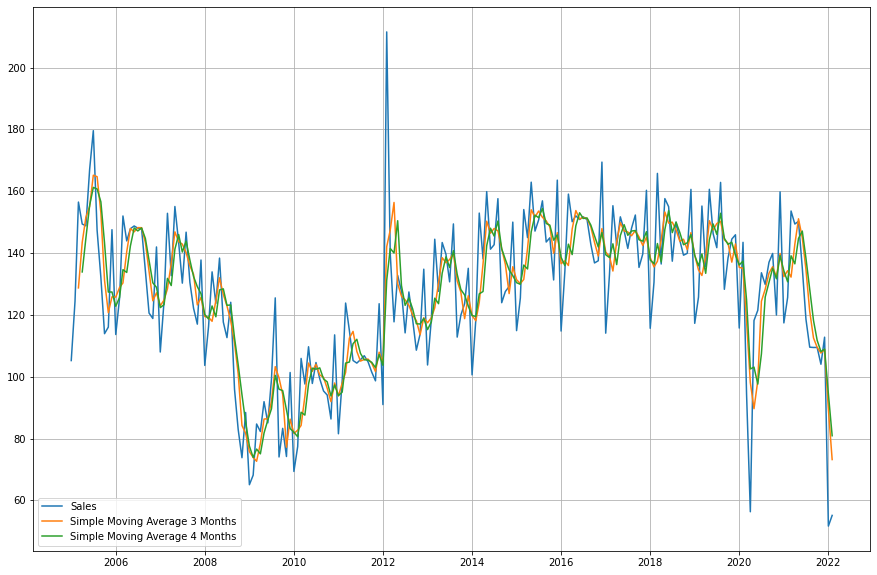

In [57]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df2['Sales'],label='Sales')
plt.plot(df2['SMA_3'],label='Simple Moving Average 3 Months')
plt.plot(df2['SMA_4'],label='Simple Moving Average 4 Months')
plt.legend(loc=3)

In [58]:
df2.dropna(subset= ["SMA_3","SMA_4"], inplace=True)  # Remove the missing values in columns "SMA_3" and "SMA_4"

In [59]:
df2

,Sales,SMA_3,SMA_4
DateMonth,,,
2005-04-01,149.3837,143.450933,133.893800
2005-05-01,148.8171,151.564867,144.792475
2005-06-01,167.1401,155.113633,155.458675
2005-07-01,179.5944,165.183867,161.233825
2005-08-01,147.4130,164.715833,160.741150
...,...,...,...
2021-10-01,109.4817,109.496000,111.779000
2021-11-01,104.0310,107.655400,108.129750
2021-12-01,112.7850,108.765900,108.937800


In [60]:
rmse1 = sqrt(mean_squared_error(df2['Sales'], df2['SMA_3']))
print(rmse1)

13.378515817447802


In [61]:
rmse2 = sqrt(mean_squared_error(df2['Sales'], df2['SMA_4']))
print(rmse2)

14.150604278441692


# Part 2: Cumulative Moving Average

In [73]:
df = pd.read_csv('Auto_Sales2022.csv',index_col = 0)
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,
2005,"1,052,224","1,244,753","1,564,938","1,493,837","1,488,171","1,671,401","1,795,944","1,474,130","1,321,156","1,139,217","1,160,447","1,475,649"
2006,"1,136,538","1,253,271","1,519,952","1,439,311","1,478,735","1,487,688","1,480,504","1,478,072","1,342,543","1,205,973","1,188,344","1,419,758"
2007,"1,079,891","1,244,375","1,528,582","1,326,837","1,550,609","1,433,282","1,302,661","1,467,601","1,305,275","1,221,485","1,170,035","1,377,542"
2008,"1,036,540","1,162,277","1,339,158","1,237,336","1,383,754","1,176,765","1,126,477","1,240,785","959,127","829,396","737,978","884,306"
2009,"650,608","681,676","847,002","822,746","919,295","850,654","991,950","1,254,982","740,394","832,953","741,826","1,013,629"
2010,"693,531","774,108","1,059,134","976,345","1,096,910","978,154","1,045,915","993,211","953,837","940,740","863,198","1,135,333"
2011,"815,408","987,265","1,238,252","1,149,240","1,052,417","1,044,037","1,055,231","1,067,895","1,048,158","1,015,016","986,664","1,236,129"
2012,"909,806","2,115,420","1,398,128","1,177,478","1,327,521","1,276,629","1,141,761","1,274,193","1,183,825","1,085,804","1,137,862","1,347,837"
2013,"1,037,967","1,185,746","1,444,773","1,276,318","1,434,096","1,396,038","1,306,885","1,494,273","1,128,124","1,198,989","1,236,413","1,350,623"


In [74]:
for i in range(len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',','').astype(float)
df = df.astype(float)/10000.0
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,
2005,105.2224,124.4753,156.4938,149.3837,148.8171,167.1401,179.5944,147.4130,132.1156,113.9217,116.0447,147.5649
2006,113.6538,125.3271,151.9952,143.9311,147.8735,148.7688,148.0504,147.8072,134.2543,120.5973,118.8344,141.9758
2007,107.9891,124.4375,152.8582,132.6837,155.0609,143.3282,130.2661,146.7601,130.5275,122.1485,117.0035,137.7542
2008,103.6540,116.2277,133.9158,123.7336,138.3754,117.6765,112.6477,124.0785,95.9127,82.9396,73.7978,88.4306
2009,65.0608,68.1676,84.7002,82.2746,91.9295,85.0654,99.1950,125.4982,74.0394,83.2953,74.1826,101.3629
2010,69.3531,77.4108,105.9134,97.6345,109.6910,97.8154,104.5915,99.3211,95.3837,94.0740,86.3198,113.5333
2011,81.5408,98.7265,123.8252,114.9240,105.2417,104.4037,105.5231,106.7895,104.8158,101.5016,98.6664,123.6129
2012,90.9806,211.5420,139.8128,117.7478,132.7521,127.6629,114.1761,127.4193,118.3825,108.5804,113.7862,134.7837
2013,103.7967,118.5746,144.4773,127.6318,143.4096,139.6038,130.6885,149.4273,112.8124,119.8989,123.6413,135.0623


In [75]:
df3 = df.stack().to_frame()
df3

0
Month              
2005  Jan  105.2224
      Feb  124.4753
      Mar  156.4938
      Apr  149.3837
      May  148.8171
...             ...
2022  Jul    0.0000
      Aug    0.0000
      Sep    0.0000
      Oct    0.0000
      Nov    0.0000

[215 rows x 1 columns]

In [76]:
df3.index.names = ['Year','Month']
df3=df3.reset_index().rename(columns= {0:'Sales'})
df3

,Year,Month,Sales
0,2005,Jan,105.2224
1,2005,Feb,124.4753
2,2005,Mar,156.4938
3,2005,Apr,149.3837
4,2005,May,148.8171
...,...,...,...
210,2022,Jul,0.0000
211,2022,Aug,0.0000
212,2022,Sep,0.0000
213,2022,Oct,0.0000


In [77]:
df3.drop(df3[df3.Sales == 0.0].index, inplace=True)
df3.drop(df3[df3.Sales <44.0].index, inplace=True)

In [78]:
import datetime
df3.Year = df3.Year.astype(str)
df3['DateMonth'] = df3['Year']+'-'+df3['Month']
df3.DateMonth = df3.DateMonth.apply(lambda x: datetime.datetime.strptime(x,'%Y-%b'))
df3.DateMonth = pd.to_datetime(df3.DateMonth)
df3.set_index('DateMonth',inplace=True)
df3

,Year,Month,Sales
DateMonth,,,
2005-01-01,2005,Jan,105.2224
2005-02-01,2005,Feb,124.4753
2005-03-01,2005,Mar,156.4938
2005-04-01,2005,Apr,149.3837
2005-05-01,2005,May,148.8171
...,...,...,...
2021-10-01,2021,Oct,109.4817
2021-11-01,2021,Nov,104.0310
2021-12-01,2021,Dec,112.7850


In [79]:
df3.drop(['Year','Month'],axis=1, inplace=True)
df3

,Sales
DateMonth,
2005-01-01,105.2224
2005-02-01,124.4753
2005-03-01,156.4938
2005-04-01,149.3837
2005-05-01,148.8171
...,...
2021-10-01,109.4817
2021-11-01,104.0310
2021-12-01,112.7850


In [80]:
df3['CMA_4'] = df3.expanding(min_periods=4).mean()  # The average of accumulated sum over 4 observations

In [81]:
df3

,Sales,CMA_4
DateMonth,,
2005-01-01,105.2224,NaN
2005-02-01,124.4753,NaN
2005-03-01,156.4938,NaN
2005-04-01,149.3837,133.893800
2005-05-01,148.8171,136.878460
...,...,...
2021-10-01,109.4817,127.836375
2021-11-01,104.0310,127.719107
2021-12-01,112.7850,127.645901


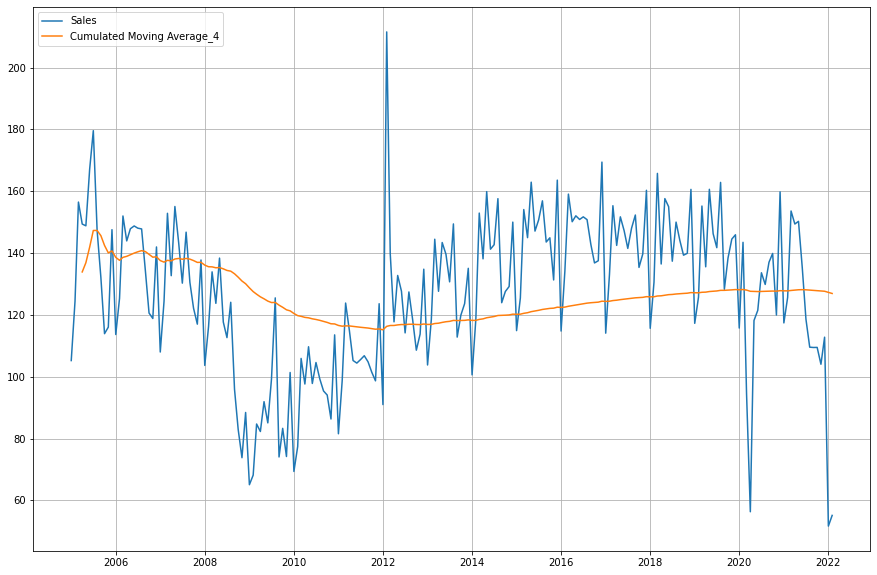

In [83]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df3['Sales'],label='Sales')
plt.plot(df3['CMA_4'],label='Cumulated Moving Average_4')
plt.legend(loc=2)

In [84]:
df3.dropna(subset= ["CMA_4"], inplace=True)
df3

,Sales,CMA_4
DateMonth,,
2005-04-01,149.3837,133.893800
2005-05-01,148.8171,136.878460
2005-06-01,167.1401,141.922067
2005-07-01,179.5944,147.303829
2005-08-01,147.4130,147.317475
...,...,...
2021-10-01,109.4817,127.836375
2021-11-01,104.0310,127.719107
2021-12-01,112.7850,127.645901


In [85]:
rmse3 = sqrt(mean_squared_error(df3['Sales'], df3['CMA_4']))
print(rmse3)

25.20623458220041


# Part 2: Exponential Moving Average

In [86]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [87]:
df = pd.read_csv('Auto_Sales2022.csv',index_col = 0)
for i in range(len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',','').astype(float)
df = df.astype(float)/10000.0
df4 = df.stack().to_frame()
df4.index.names = ['Year','Month']
df4=df4.reset_index().rename(columns= {0:'Sales'})
df4.drop(df4[df4.Sales == 0.0].index, inplace=True)
df4.drop(df4[df4.Sales <44.0].index, inplace=True)
df4.Year = df4.Year.astype(str)
df4['DateMonth'] = df4['Year']+'-'+df4['Month']
df4.DateMonth = df4.DateMonth.apply(lambda x: datetime.datetime.strptime(x,'%Y-%b'))
df4.DateMonth = pd.to_datetime(df4.DateMonth)
df4.set_index('DateMonth',inplace=True)
df4.drop(['Year','Month'],axis=1, inplace=True)
df4

,Sales
DateMonth,
2005-01-01,105.2224
2005-02-01,124.4753
2005-03-01,156.4938
2005-04-01,149.3837
2005-05-01,148.8171
...,...
2021-10-01,109.4817
2021-11-01,104.0310
2021-12-01,112.7850


In [88]:
df4['EMA'] = df4.iloc[:,0].ewm(span=15,adjust=False).mean()  # the weight alpha=2/(span+1)

In [89]:
df4

,Sales,EMA
DateMonth,,
2005-01-01,105.2224,105.222400
2005-02-01,124.4753,107.629012
2005-03-01,156.4938,113.737111
2005-04-01,149.3837,118.192935
2005-05-01,148.8171,122.020955
...,...,...
2021-10-01,109.4817,125.974428
2021-11-01,104.0310,123.231500
2021-12-01,112.7850,121.925687


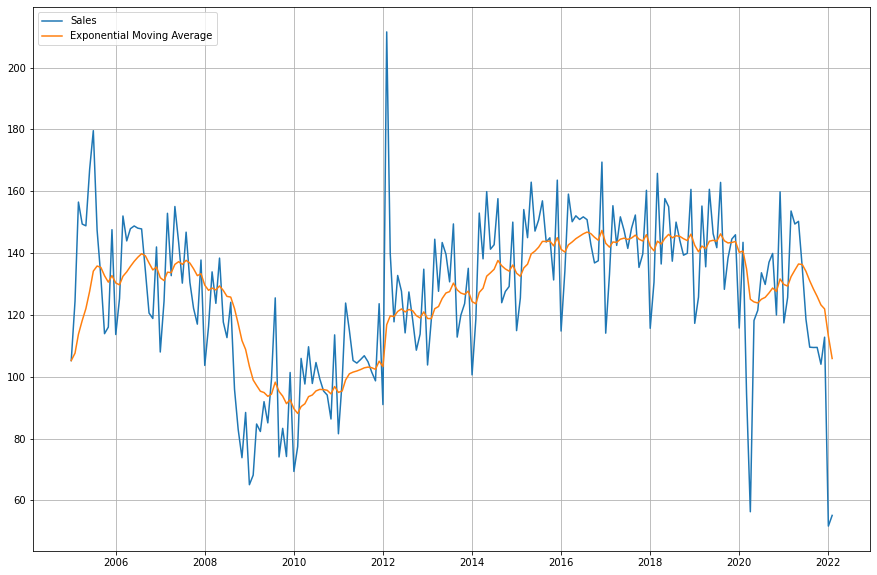

In [90]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df4['Sales'],label='Sales')
plt.plot(df4['EMA'],label='Exponential Moving Average')
plt.legend(loc=2)

In [91]:
rmse4 = sqrt(mean_squared_error(df4['Sales'], df4['EMA']))
print(rmse4)

17.920382020282588


# Part 3: Simple Exponential Smoothing

In [112]:
df = pd.read_csv('Auto_Sales2022.csv',index_col = 0)
for i in range(len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',','').astype(float)
df = df.astype(float)/10000.0
df5 = df.stack().to_frame()
df5.index.names = ['Year','Month']
df5=df5.reset_index().rename(columns= {0:'Sales'})
df5.drop(df5[df5.Sales == 0.0].index, inplace=True)
df5.drop(df5[df5.Sales <44.0].index, inplace=True)
df5.Year = df5.Year.astype(str)
df5['DateMonth'] = df5['Year']+'-'+df5['Month']
df5.DateMonth = df5.DateMonth.apply(lambda x: datetime.datetime.strptime(x,'%Y-%b'))
df5.DateMonth = pd.to_datetime(df5.DateMonth)
df5.set_index('DateMonth',inplace=True)
df5.drop(['Year','Month'],axis=1, inplace=True)
df5

,Sales
DateMonth,
2005-01-01,105.2224
2005-02-01,124.4753
2005-03-01,156.4938
2005-04-01,149.3837
2005-05-01,148.8171
...,...
2021-10-01,109.4817
2021-11-01,104.0310
2021-12-01,112.7850


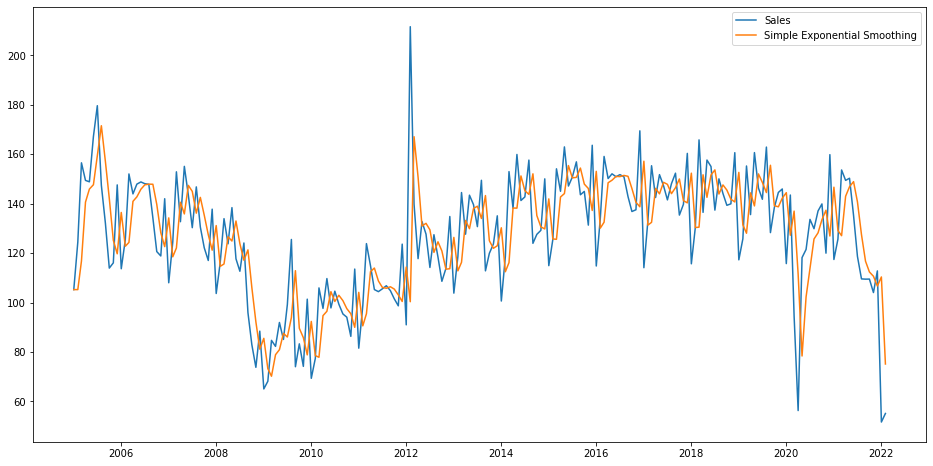

In [113]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit2 = SimpleExpSmoothing(np.asarray(df5['Sales'])).fit(smoothing_level=0.6,optimized=False)
df5['SES'] = fit2.fittedvalues
plt.figure(figsize=(16,8))
plt.plot(df5['Sales'], label='Sales')
plt.plot(df5['SES'], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [114]:
df5

,Sales,SES
DateMonth,,
2005-01-01,105.2224,105.222400
2005-02-01,124.4753,105.222400
2005-03-01,156.4938,116.774140
2005-04-01,149.3837,140.605936
2005-05-01,148.8171,145.872594
...,...,...
2021-10-01,109.4817,112.357393
2021-11-01,104.0310,110.631977
2021-12-01,112.7850,106.671391


In [115]:
rmse5 = sqrt(mean_squared_error(df5['Sales'], df5['SES']))
print(rmse5)

19.626441702583612


# Part 3: Holt's Linear Trend Method

In [116]:
df = pd.read_csv('Auto_Sales2022.csv',index_col = 0)
for i in range(len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',','').astype(float)
df = df.astype(float)/10000.0
df6 = df.stack().to_frame()
df6.index.names = ['Year','Month']
df6=df6.reset_index().rename(columns= {0:'Sales'})
df6.drop(df6[df6.Sales == 0.0].index, inplace=True)
df6.drop(df6[df6.Sales <44.0].index, inplace=True)
df6.Year = df6.Year.astype(str)
df6['DateMonth'] = df6['Year']+'-'+df6['Month']
df6.DateMonth = df6.DateMonth.apply(lambda x: datetime.datetime.strptime(x,'%Y-%b'))
df6.DateMonth = pd.to_datetime(df6.DateMonth)
df6.set_index('DateMonth',inplace=True)
df6.drop(['Year','Month'],axis=1, inplace=True)
df6

,Sales
DateMonth,
2005-01-01,105.2224
2005-02-01,124.4753
2005-03-01,156.4938
2005-04-01,149.3837
2005-05-01,148.8171
...,...
2021-10-01,109.4817
2021-11-01,104.0310
2021-12-01,112.7850


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


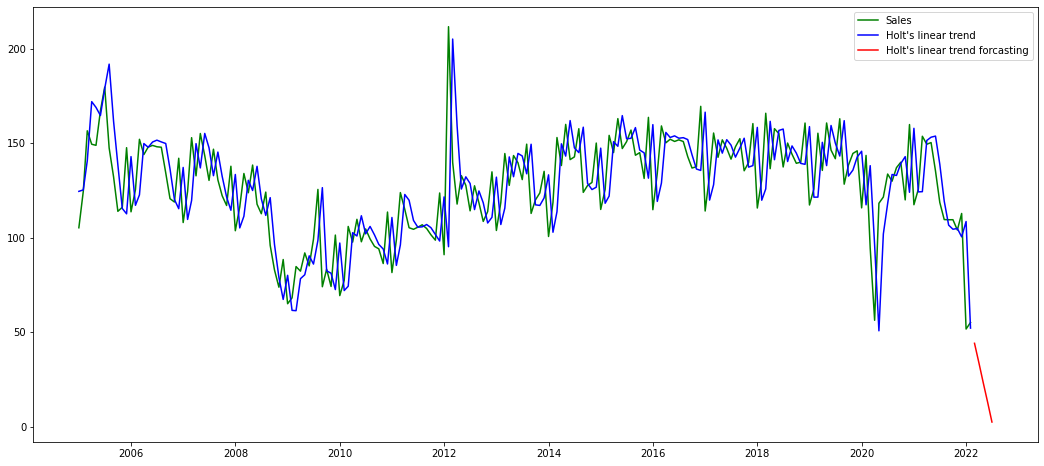

In [117]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = Holt(df6['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")

df6['Holts Linear'] = fit1.fittedvalues
plt.plot(df6['Sales'], color='green', label='Sales')
plt.plot(df6['Holts Linear'], color='blue', label="Holt's linear trend")
plt.plot(fcast1, color='red', label="Holt's linear trend forcasting")
plt.legend(loc='best')

plt.show()

In [118]:
df6

,Sales,Holts Linear
DateMonth,,
2005-01-01,105.2224,124.475300
2005-02-01,124.4753,125.245416
2005-03-01,156.4938,140.678541
2005-04-01,149.3837,171.910407
2005-05-01,148.8171,168.864427
...,...,...
2021-10-01,109.4817,104.447438
2021-11-01,104.0310,104.841400
2021-12-01,112.7850,100.429968


In [119]:
df6.dropna(subset= ["Holts Linear"], inplace=True)
df6

,Sales,Holts Linear
DateMonth,,
2005-01-01,105.2224,124.475300
2005-02-01,124.4753,125.245416
2005-03-01,156.4938,140.678541
2005-04-01,149.3837,171.910407
2005-05-01,148.8171,168.864427
...,...,...
2021-10-01,109.4817,104.447438
2021-11-01,104.0310,104.841400
2021-12-01,112.7850,100.429968


In [120]:
rmse6 = sqrt(mean_squared_error(df6['Sales'], df6['Holts Linear']))
print(rmse6)

22.35452725377951


# Part 4: Holts Winters Methods

In [121]:
df = pd.read_csv('Auto_Sales2022.csv',index_col = 0)
for i in range(len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',','').astype(float)
df = df.astype(float)/10000.0
df7 = df.stack().to_frame()
df7.index.names = ['Year','Month']
df7=df7.reset_index().rename(columns= {0:'Sales'})
df7.drop(df7[df7.Sales == 0.0].index, inplace=True)
df7.drop(df7[df7.Sales <44.0].index, inplace=True)
df7.Year = df7.Year.astype(str)
df7['DateMonth'] = df7['Year']+'-'+df7['Month']
df7.DateMonth = df7.DateMonth.apply(lambda x: datetime.datetime.strptime(x,'%Y-%b'))
df7.DateMonth = pd.to_datetime(df7.DateMonth)
df7.set_index('DateMonth',inplace=True)
df7.drop(['Year','Month'],axis=1, inplace=True)
df7

,Sales
DateMonth,
2005-01-01,105.2224
2005-02-01,124.4753
2005-03-01,156.4938
2005-04-01,149.3837
2005-05-01,148.8171
...,...
2021-10-01,109.4817
2021-11-01,104.0310
2021-12-01,112.7850


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


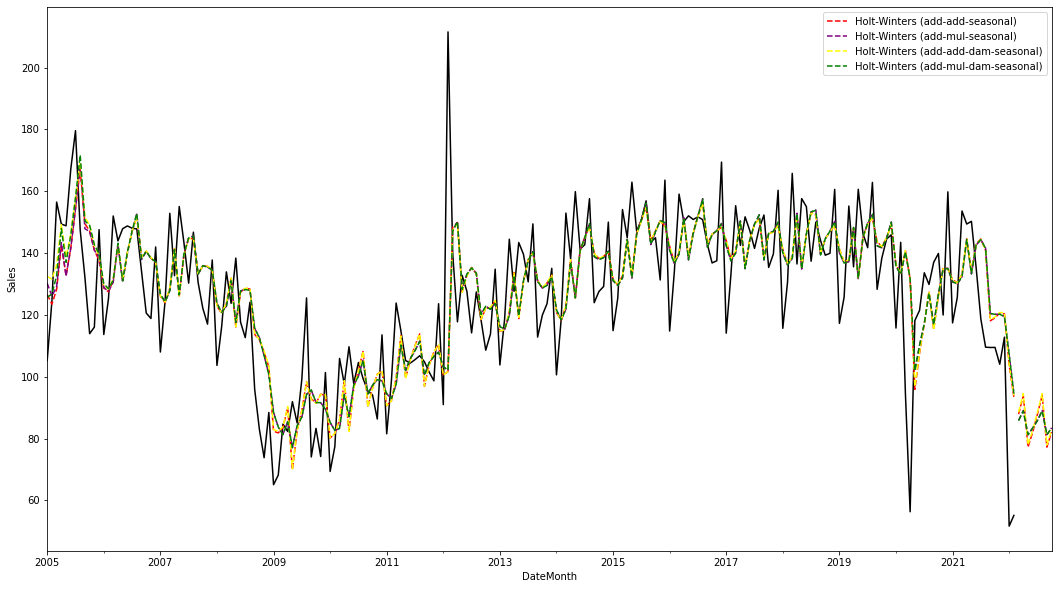

,Additive,Multiplicative,Additive Dam,Multiplica Dam
alpha,3.312734e-01,3.174146e-01,3.235456e-01,3.182291e-01
beta,4.535408e-17,3.398669e-09,1.442381e-17,1.433559e-09
phi,NaN,NaN,7.026000e-01,7.399224e-01
gamma,1.688669e-15,0.000000e+00,1.584472e-17,0.000000e+00
l_0,1.798696e+03,1.859419e+03,1.805800e+03,1.849014e+03
b_0,0.000000e+00,0.000000e+00,2.064653e+02,1.874795e+02
SSE,6.833697e+04,6.897938e+04,6.812616e+04,6.849652e+04


In [123]:
fit1 = ExponentialSmoothing(df7['Sales'], seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(df7['Sales'], seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(df7['Sales'], seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(df7['Sales'], seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
results=pd.DataFrame(index=[r"alpha",r"beta",r"phi",r"gamma",r"l_0","b_0","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = df7['Sales'].plot(figsize=(18,10), color='black' )
ax.set_ylabel("Sales")
ax.set_xlabel("Date")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='purple')
fit3.fittedvalues.plot(ax=ax, style='--', color='yellow')
fit4.fittedvalues.plot(ax=ax, style='--', color='green')
df7['Holts Add'] = fit1.fittedvalues
df7['Holts Mult'] = fit2.fittedvalues
df7['Holts Damped Add'] = fit3.fittedvalues
df7['Holts Damped Mult'] = fit4.fittedvalues

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', color='purple', legend=True)
fit3.forecast(8).rename('Holt-Winters (add-add-dam-seasonal)').plot(ax=ax, style='--', color='yellow', legend=True)
fit4.forecast(8).rename('Holt-Winters (add-mul-dam-seasonal)').plot(ax=ax, style='--', color='green', legend=True)

plt.show()

results

In [124]:
df7

,Sales,Holts Add,Holts Mult,Holts Damped Add,Holts Damped Mult
DateMonth,,,,,
2005-01-01,105.2224,126.581522,130.240076,132.470377,125.694925
2005-02-01,124.4753,123.460413,126.036337,131.567088,126.725195
2005-03-01,156.4938,128.249303,129.158075,136.240046,132.697171
2005-04-01,149.3837,142.520171,143.393972,149.195712,147.930567
2005-05-01,148.8171,132.768244,132.522036,138.752080,137.005555
...,...,...,...,...,...
2021-10-01,109.4817,119.042412,120.206532,119.346391,120.173485
2021-11-01,104.0310,120.580373,120.240234,120.804074,120.204109
2021-12-01,112.7850,120.320666,119.571261,120.657706,119.436801


In [125]:
df7.dropna(subset= ["Holts Add","Holts Mult","Holts Damped Add", "Holts Damped Mult"], inplace=True)
df7

,Sales,Holts Add,Holts Mult,Holts Damped Add,Holts Damped Mult
DateMonth,,,,,
2005-01-01,105.2224,126.581522,130.240076,132.470377,125.694925
2005-02-01,124.4753,123.460413,126.036337,131.567088,126.725195
2005-03-01,156.4938,128.249303,129.158075,136.240046,132.697171
2005-04-01,149.3837,142.520171,143.393972,149.195712,147.930567
2005-05-01,148.8171,132.768244,132.522036,138.752080,137.005555
...,...,...,...,...,...
2021-10-01,109.4817,119.042412,120.206532,119.346391,120.173485
2021-11-01,104.0310,120.580373,120.240234,120.804074,120.204109
2021-12-01,112.7850,120.320666,119.571261,120.657706,119.436801


In [126]:
rmse7 = sqrt(mean_squared_error(df7['Sales'], df7['Holts Add']))
print(rmse7)

18.213534525043322


In [127]:
rmse8 = sqrt(mean_squared_error(df7['Sales'], df7['Holts Mult']))
print(rmse8)

18.29894452546405


In [128]:
rmse9 = sqrt(mean_squared_error(df7['Sales'], df7['Holts Damped Add']))
print(rmse9)

18.18542060449061


In [129]:
rmse10 = sqrt(mean_squared_error(df7['Sales'], df7['Holts Damped Mult']))
print(rmse10)

18.234784304904842


# Part 5: SARIMA Method

In [130]:
df = pd.read_csv('Auto_Sales2022.csv',index_col = 0)
for i in range(len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',','').astype(float)
df = df.astype(float)/10000.0
df8 = df.stack().to_frame()
df8.index.names = ['Year','Month']
df8=df8.reset_index().rename(columns= {0:'Sales'})
df8.drop(df8[df8.Sales == 0.0].index, inplace=True)
df8.drop(df8[df8.Sales <44.0].index, inplace=True)
df8.Year = df8.Year.astype(str)
df8['DateMonth'] = df8['Year']+'-'+df8['Month']
df8.DateMonth = df8.DateMonth.apply(lambda x: datetime.datetime.strptime(x,'%Y-%b'))
df8.DateMonth = pd.to_datetime(df8.DateMonth)
df8.set_index('DateMonth',inplace=True)
df8.drop(['Year','Month'],axis=1, inplace=True)
df8

,Sales
DateMonth,
2005-01-01,105.2224
2005-02-01,124.4753
2005-03-01,156.4938
2005-04-01,149.3837
2005-05-01,148.8171
...,...
2021-10-01,109.4817
2021-11-01,104.0310
2021-12-01,112.7850


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<function matplotlib.pyplot.show>

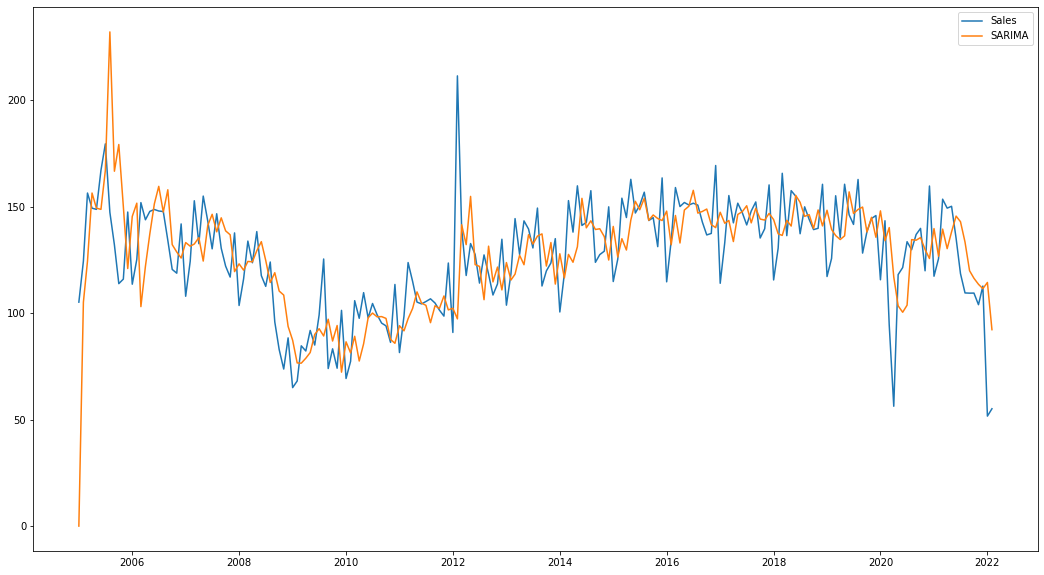

In [132]:
df8 = pd.DataFrame(df8.iloc[:,0])
fit_sarima = sm.tsa.statespace.SARIMAX(df8.Sales, order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
df8['SARIMA']= fit_sarima.predict(start="2005-01-01", end="2022-02-01", dynamic = False)

plt.figure(figsize=(18,10))
plt.plot(df8['Sales'], label='Sales')
plt.plot(df8['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show

In [133]:
df8

,Sales,SARIMA
DateMonth,,
2005-01-01,105.2224,0.000000
2005-02-01,124.4753,105.197840
2005-03-01,156.4938,124.459868
2005-04-01,149.3837,156.494714
2005-05-01,148.8171,149.374424
...,...,...
2021-10-01,109.4817,116.442093
2021-11-01,104.0310,113.612103
2021-12-01,112.7850,111.556314


In [134]:
rmse11 = sqrt(mean_squared_error(df8['Sales'], df8['SARIMA']))
print(rmse11)

22.14033081409544
